In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support, confusion_matrix  # , classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


# Cargar datos y formatearlos 

In [20]:
oj = pd.read_csv('OJ.csv')

oj=oj.drop(['Store7'],axis=1)
feats = oj.columns[2:]
print(feats)
oj['target'] = list(map(lambda x: 1 if x=='CH' else -1, oj.Purchase))
oj.head()

Index(['WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM', 'DiscCH', 'DiscMM',
       'SpecialCH', 'SpecialMM', 'LoyalCH', 'SalePriceMM', 'SalePriceCH',
       'PriceDiff', 'PctDiscMM', 'PctDiscCH', 'ListPriceDiff', 'STORE'],
      dtype='object')


,Unnamed: 0,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,target
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0.000000,0.000000,0.24,1,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0.150754,0.000000,0.24,1,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0.000000,0.091398,0.23,1,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0.000000,0.000000,0.00,1,-1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,0.000000,0.000000,0.00,0,1


# Primera parte

## Kernel linear

We have to normalize if we want the algorithm to finish in this lifetime!!!

In [21]:
# oj =oj.drop(['Purchase'],axis=1)
oj[feats]=oj[feats].apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
# np.max(x) - np.min(x)
oj.head()

,Unnamed: 0,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,target
0,1,CH,-0.340810,-0.493302,-0.293551,-0.159019,-0.10372,-0.154206,-0.147664,-0.161682,-0.065787,0.025412,-0.093658,0.071385,-0.147505,-0.108093,0.050021,-0.15771,1
1,2,CH,-0.301594,-0.493302,-0.293551,-0.159019,-0.10372,0.220794,-0.147664,0.838318,0.034220,-0.247315,-0.093658,-0.157623,0.227496,-0.108093,0.050021,-0.15771,1
2,3,CH,-0.183947,-0.493302,-0.018551,0.007648,0.23628,-0.154206,-0.147664,-0.161682,0.114225,0.116321,-0.179372,0.193522,-0.147505,0.253610,0.027294,-0.15771,1
3,4,MM,-0.536888,-0.493302,-0.443551,-0.659019,-0.10372,-0.154206,-0.147664,-0.161682,-0.165793,-0.247315,-0.179372,-0.111821,-0.147505,-0.108093,-0.495433,-0.15771,-1
4,5,CH,-0.517281,0.506698,-0.443551,-0.659019,-0.10372,-0.154206,-0.147664,-0.161682,0.390778,-0.247315,-0.179372,-0.111821,-0.147505,-0.108093,-0.495433,-0.40771,1


In [22]:
oj.dtypes

Unnamed: 0          int64
Purchase           object
WeekofPurchase    float64
StoreID           float64
PriceCH           float64
PriceMM           float64
DiscCH            float64
DiscMM            float64
SpecialCH         float64
SpecialMM         float64
LoyalCH           float64
SalePriceMM       float64
SalePriceCH       float64
PriceDiff         float64
PctDiscMM         float64
PctDiscCH         float64
ListPriceDiff     float64
STORE             float64
target              int64
dtype: object

In [44]:
def rf():
    params = {
        'C': [2**i for i in range(-2,15,1)],
        'kernel':['linear']
#         'gamma': [3]
    }
    return svm.SVC(), params
def scorers():
    scoring = {'accuracy': make_scorer(accuracy_score),
               'precision': make_scorer(precision_score, average='weighted'),
               'recall': make_scorer(recall_score, average='weighted'),
               'f1_score': make_scorer(f1_score, average='weighted')
               }
    return scoring

In [45]:
model,params = rf()

grid_search = GridSearchCV(model, params, cv=(2), scoring=scorers(),
                               refit='f1_score', return_train_score=True,verbose=42)
# grid_search = GridSearchCV(model, params, cv=3, scoring=scorers(),
#                                refit='f1_score', return_train_score=True,verbose=100)
grid_search.fit(oj[feats], oj.target)
# Copy classifier
clf = grid_search

Fitting 2 folds for each of 17 candidates, totalling 34 fits
[CV] C=0.25, kernel=linear ...........................................
[CV]  C=0.25, kernel=linear, accuracy=0.8190298507462687, precision=0.8206234452736318, recall=0.8190298507462687, f1_score=0.8145272672949966, total=   0.0s
[CV] C=0.25, kernel=linear ...........................................
[CV]  C=0.25, kernel=linear, accuracy=0.8314606741573034, precision=0.8355748854903672, recall=0.8314606741573034, f1_score=0.8325632152122571, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV]  C=0.5, kernel=linear, accuracy=0.8227611940298507, precision=0.8232277007987306, recall=0.8227611940298507, f1_score=0.8191645264942383, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV]  C=0.5, kernel=linear, accuracy=0.8239700374531835, precision=0.8301909949854301, recall=0.8239700374531835, f1_score=0.8254072247559687, total=   0.0s
[CV] C=1, kernel=linear .

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s


[CV]  C=1, kernel=linear, accuracy=0.8164794007490637, precision=0.8243183252194, recall=0.8164794007490637, f1_score=0.8181486369688616, total=   0.0s
[CV] C=2, kernel=linear ..............................................
[CV]  C=2, kernel=linear, accuracy=0.8227611940298507, precision=0.8228622512437811, recall=0.8227611940298507, f1_score=0.8194220724201824, total=   0.0s
[CV] C=2, kernel=linear ..............................................
[CV]  C=2, kernel=linear, accuracy=0.8258426966292135, precision=0.8316818840792586, recall=0.8258426966292135, f1_score=0.8272207878535425, total=   0.0s
[CV] C=4, kernel=linear ..............................................
[CV]  C=4, kernel=linear, accuracy=0.8208955223880597, precision=0.82045408841432, recall=0.8208955223880597, f1_score=0.8178991099845319, total=   0.0s
[CV] C=4, kernel=linear ..............................................
[CV]  C=4, kernel=linear, accuracy=0.8164794007490637, precision=0.8243183252194, recall=0.8164794007

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s


[CV]  C=16, kernel=linear, accuracy=0.8246268656716418, precision=0.8246475356563108, recall=0.8246268656716418, f1_score=0.8214478484479066, total=   0.0s
[CV] C=16, kernel=linear .............................................
[CV]  C=16, kernel=linear, accuracy=0.8202247191011236, precision=0.8264905793996372, recall=0.8202247191011236, f1_score=0.8216924848571594, total=   0.0s
[CV] C=32, kernel=linear .............................................
[CV]  C=32, kernel=linear, accuracy=0.8302238805970149, precision=0.8310801796883367, recall=0.8302238805970149, f1_score=0.826778651694481, total=   0.0s
[CV] C=32, kernel=linear .............................................
[CV]  C=32, kernel=linear, accuracy=0.8202247191011236, precision=0.8272367873491469, recall=0.8202247191011236, f1_score=0.8217788748841246, total=   0.0s
[CV] C=64, kernel=linear .............................................
[CV]  C=64, kernel=linear, accuracy=0.8302238805970149, precision=0.8315249159899455, recall=

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.6s remaining:    0.0s


[CV]  C=128, kernel=linear, accuracy=0.8302238805970149, precision=0.8315249159899455, recall=0.8302238805970149, f1_score=0.8265255391740094, total=   0.0s
[CV] C=128, kernel=linear ............................................
[CV]  C=128, kernel=linear, accuracy=0.8220973782771536, precision=0.828709347371081, recall=0.8220973782771536, f1_score=0.823593266610923, total=   0.1s
[CV] C=256, kernel=linear ............................................


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.9s remaining:    0.0s


[CV]  C=256, kernel=linear, accuracy=0.8283582089552238, precision=0.8285498760857909, recall=0.8283582089552238, f1_score=0.8252468303958237, total=   0.1s
[CV] C=256, kernel=linear ............................................
[CV]  C=256, kernel=linear, accuracy=0.8220973782771536, precision=0.828709347371081, recall=0.8220973782771536, f1_score=0.823593266610923, total=   0.1s
[CV] C=512, kernel=linear ............................................
[CV]  C=512, kernel=linear, accuracy=0.8264925373134329, precision=0.8267723880597014, recall=0.8264925373134329, f1_score=0.8232237130008101, total=   0.1s
[CV] C=512, kernel=linear ............................................


[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.1s remaining:    0.0s


[CV]  C=512, kernel=linear, accuracy=0.8220973782771536, precision=0.828709347371081, recall=0.8220973782771536, f1_score=0.823593266610923, total=   0.2s
[CV] C=1024, kernel=linear ...........................................
[CV]  C=1024, kernel=linear, accuracy=0.8264925373134329, precision=0.8267723880597014, recall=0.8264925373134329, f1_score=0.8232237130008101, total=   0.1s
[CV] C=1024, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.4s remaining:    0.0s


[CV]  C=1024, kernel=linear, accuracy=0.8220973782771536, precision=0.828709347371081, recall=0.8220973782771536, f1_score=0.823593266610923, total=   0.4s
[CV] C=2048, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    1.8s remaining:    0.0s


[CV]  C=2048, kernel=linear, accuracy=0.8246268656716418, precision=0.8253947740873333, recall=0.8246268656716418, f1_score=0.8209381614576786, total=   0.3s
[CV] C=2048, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    2.1s remaining:    0.0s


[CV]  C=2048, kernel=linear, accuracy=0.8220973782771536, precision=0.828709347371081, recall=0.8220973782771536, f1_score=0.823593266610923, total=   0.8s
[CV] C=4096, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    3.0s remaining:    0.0s


[CV]  C=4096, kernel=linear, accuracy=0.8246268656716418, precision=0.8253947740873333, recall=0.8246268656716418, f1_score=0.8209381614576786, total=   0.7s
[CV] C=4096, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    3.6s remaining:    0.0s


[CV]  C=4096, kernel=linear, accuracy=0.8220973782771536, precision=0.828709347371081, recall=0.8220973782771536, f1_score=0.823593266610923, total=   2.6s
[CV] C=8192, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    6.2s remaining:    0.0s


[CV]  C=8192, kernel=linear, accuracy=0.8246268656716418, precision=0.8253947740873333, recall=0.8246268656716418, f1_score=0.8209381614576786, total=   1.9s
[CV] C=8192, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    8.1s remaining:    0.0s


[CV]  C=8192, kernel=linear, accuracy=0.8220973782771536, precision=0.828709347371081, recall=0.8220973782771536, f1_score=0.823593266610923, total=   4.8s
[CV] C=16384, kernel=linear ..........................................


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:   12.9s remaining:    0.0s


[CV]  C=16384, kernel=linear, accuracy=0.8246268656716418, precision=0.8253947740873333, recall=0.8246268656716418, f1_score=0.8209381614576786, total=   2.0s
[CV] C=16384, kernel=linear ..........................................


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   15.0s remaining:    0.0s


[CV]  C=16384, kernel=linear, accuracy=0.8239700374531835, precision=0.8301909949854301, recall=0.8239700374531835, f1_score=0.8254072247559687, total=   4.1s


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   19.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   19.0s finished


In [46]:
# clf.get_params
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print('With a f1_score of:')
print()
print()

Best parameters set found on development set:

{'C': 64, 'kernel': 'linear'}


In [49]:
f1s=clf.cv_results_['mean_test_f1_score']

plt.plot([2**i for i in range(-2,15,1)],f1s)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('f1_score')

# Kernel radial

In [113]:
def rf():
    params = {
        'C': [i for i in np.linspace(0.000000001,4,20)],
        'gamma':[i for i in np.linspace(0.000000001,4,20)],
        'kernel':['rbf']
#         'gamma': [3]
    }
    return svm.SVC(), params
def scorers():
    scoring = {'accuracy': make_scorer(accuracy_score),
               'precision': make_scorer(precision_score, average='weighted'),
               'recall': make_scorer(recall_score, average='weighted'),
               'f1_score': make_scorer(f1_score, average='weighted')
               }
    return scoring

In [114]:
model,params = rf()

grid_search = GridSearchCV(model, params, cv=(2), scoring=scorers(),
                               refit='f1_score', return_train_score=True,verbose=42)
# grid_search = GridSearchCV(model, params, cv=3, scoring=scorers(),
#                                refit='f1_score', return_train_score=True,verbose=100)
grid_search.fit(oj[feats], oj.target)
# Copy classifier
clf = grid_search

Fitting 2 folds for each of 400 candidates, totalling 800 fits
[CV] C=1e-09, gamma=1e-09, kernel=rbf ................................
[CV]  C=1e-09, gamma=1e-09, kernel=rbf, accuracy=0.6100746268656716, precision=0.37219105034528843, recall=0.6100746268656716, f1_score=0.46232770100828413, total=   0.1s
[CV] C=1e-09, gamma=1e-09, kernel=rbf ................................


/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samp

[CV]  C=1e-09, gamma=1e-09, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.0s
[CV] C=1e-09, gamma=0.2105263167368421, kernel=rbf ...................
[CV]  C=1e-09, gamma=0.2105263167368421, kernel=rbf, accuracy=0.6100746268656716, precision=0.37219105034528843, recall=0.6100746268656716, f1_score=0.46232770100828413, total=   0.1s
[CV] C=1e-09, gamma=0.2105263167368421, kernel=rbf ...................
[CV]  C=1e-09, gamma=0.2105263167368421, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.0s
[CV] C=1e-09, gamma=0.42105263247368424, kernel=rbf ..................


/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samp

[CV]  C=1e-09, gamma=0.42105263247368424, kernel=rbf, accuracy=0.6100746268656716, precision=0.37219105034528843, recall=0.6100746268656716, f1_score=0.46232770100828413, total=   0.1s
[CV] C=1e-09, gamma=0.42105263247368424, kernel=rbf ..................
[CV]  C=1e-09, gamma=0.42105263247368424, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.1s
[CV] C=1e-09, gamma=0.6315789482105263, kernel=rbf ...................
[CV]  C=1e-09, gamma=0.6315789482105263, kernel=rbf, accuracy=0.6100746268656716, precision=0.37219105034528843, recall=0.6100746268656716, f1_score=0.46232770100828413, total=   0.0s
[CV] C=1e-09, gamma=0.6315789482105263, kernel=rbf ...................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarni

[CV]  C=1e-09, gamma=0.6315789482105263, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.1s
[CV] C=1e-09, gamma=0.8421052639473684, kernel=rbf ...................
[CV]  C=1e-09, gamma=0.8421052639473684, kernel=rbf, accuracy=0.6100746268656716, precision=0.37219105034528843, recall=0.6100746268656716, f1_score=0.46232770100828413, total=   0.0s
[CV] C=1e-09, gamma=0.8421052639473684, kernel=rbf ...................
[CV]  C=1e-09, gamma=0.8421052639473684, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.0s
[CV] C=1e-09, gamma=1.0526315796842107, kernel=rbf ...................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s remaining:    0.0s
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.1s remaining:    0.0s
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarni

[CV]  C=1e-09, gamma=1.0526315796842107, kernel=rbf, accuracy=0.6100746268656716, precision=0.37219105034528843, recall=0.6100746268656716, f1_score=0.46232770100828413, total=   0.1s
[CV] C=1e-09, gamma=1.0526315796842107, kernel=rbf ...................
[CV]  C=1e-09, gamma=1.0526315796842107, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.0s
[CV] C=1e-09, gamma=1.2631578954210527, kernel=rbf ...................
[CV]  C=1e-09, gamma=1.2631578954210527, kernel=rbf, accuracy=0.6100746268656716, precision=0.37219105034528843, recall=0.6100746268656716, f1_score=0.46232770100828413, total=   0.1s
[CV] C=1e-09, gamma=1.2631578954210527, kernel=rbf ...................


/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.2s remaining:    0.0s
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samp

[CV]  C=1e-09, gamma=1.2631578954210527, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.0s
[CV] C=1e-09, gamma=1.4736842111578947, kernel=rbf ...................
[CV]  C=1e-09, gamma=1.4736842111578947, kernel=rbf, accuracy=0.6100746268656716, precision=0.37219105034528843, recall=0.6100746268656716, f1_score=0.46232770100828413, total=   0.1s
[CV] C=1e-09, gamma=1.4736842111578947, kernel=rbf ...................


/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.4s remaining:    0.0s
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.5s remaining:    0.0s
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning

[CV]  C=1e-09, gamma=1.4736842111578947, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.1s
[CV] C=1e-09, gamma=1.684210526894737, kernel=rbf ....................
[CV]  C=1e-09, gamma=1.684210526894737, kernel=rbf, accuracy=0.6100746268656716, precision=0.37219105034528843, recall=0.6100746268656716, f1_score=0.46232770100828413, total=   0.1s
[CV] C=1e-09, gamma=1.684210526894737, kernel=rbf ....................


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.6s remaining:    0.0s
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.8s remaining:    0.0s
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarni

[CV]  C=1e-09, gamma=1.684210526894737, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.1s
[CV] C=1e-09, gamma=1.8947368426315792, kernel=rbf ...................
[CV]  C=1e-09, gamma=1.8947368426315792, kernel=rbf, accuracy=0.6100746268656716, precision=0.37219105034528843, recall=0.6100746268656716, f1_score=0.46232770100828413, total=   0.0s
[CV] C=1e-09, gamma=1.8947368426315792, kernel=rbf ...................
[CV]  C=1e-09, gamma=1.8947368426315792, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.0s
[CV] C=1e-09, gamma=2.1052631583684214, kernel=rbf ...................


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    1.9s remaining:    0.0s
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.0s remaining:    0.0s
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarni

[CV]  C=1e-09, gamma=2.1052631583684214, kernel=rbf, accuracy=0.6100746268656716, precision=0.37219105034528843, recall=0.6100746268656716, f1_score=0.46232770100828413, total=   0.1s
[CV] C=1e-09, gamma=2.1052631583684214, kernel=rbf ...................
[CV]  C=1e-09, gamma=2.1052631583684214, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.1s
[CV] C=1e-09, gamma=2.315789474105263, kernel=rbf ....................
[CV]  C=1e-09, gamma=2.315789474105263, kernel=rbf, accuracy=0.6100746268656716, precision=0.37219105034528843, recall=0.6100746268656716, f1_score=0.46232770100828413, total=   0.0s
[CV] C=1e-09, gamma=2.315789474105263, kernel=rbf ....................


/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    2.1s remaining:    0.0s
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samp

[CV]  C=1e-09, gamma=2.315789474105263, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.1s
[CV] C=1e-09, gamma=2.5263157898421054, kernel=rbf ...................
[CV]  C=1e-09, gamma=2.5263157898421054, kernel=rbf, accuracy=0.6100746268656716, precision=0.37219105034528843, recall=0.6100746268656716, f1_score=0.46232770100828413, total=   0.1s
[CV] C=1e-09, gamma=2.5263157898421054, kernel=rbf ...................


/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    2.6s remaining:    0.0s
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samp

[CV]  C=1e-09, gamma=2.5263157898421054, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.1s
[CV] C=1e-09, gamma=2.7368421055789476, kernel=rbf ...................
[CV]  C=1e-09, gamma=2.7368421055789476, kernel=rbf, accuracy=0.6100746268656716, precision=0.37219105034528843, recall=0.6100746268656716, f1_score=0.46232770100828413, total=   0.0s
[CV] C=1e-09, gamma=2.7368421055789476, kernel=rbf ...................
[CV]  C=1e-09, gamma=2.7368421055789476, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.0s
[CV] C=1e-09, gamma=2.9473684213157894, kernel=rbf ...................


/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    2.8s remaining:    0.0s
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    2.9s remaining:    0.0s
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning

[CV]  C=1e-09, gamma=2.9473684213157894, kernel=rbf, accuracy=0.6100746268656716, precision=0.37219105034528843, recall=0.6100746268656716, f1_score=0.46232770100828413, total=   0.0s
[CV] C=1e-09, gamma=2.9473684213157894, kernel=rbf ...................
[CV]  C=1e-09, gamma=2.9473684213157894, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.0s
[CV] C=1e-09, gamma=3.1578947370526316, kernel=rbf ...................
[CV]  C=1e-09, gamma=3.1578947370526316, kernel=rbf, accuracy=0.6100746268656716, precision=0.37219105034528843, recall=0.6100746268656716, f1_score=0.46232770100828413, total=   0.1s
[CV] C=1e-09, gamma=3.1578947370526316, kernel=rbf ...................


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    3.0s remaining:    0.0s
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    3.1s remaining:    0.0s
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarni

[CV]  C=1e-09, gamma=3.1578947370526316, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.1s
[CV] C=1e-09, gamma=3.368421052789474, kernel=rbf ....................
[CV]  C=1e-09, gamma=3.368421052789474, kernel=rbf, accuracy=0.6100746268656716, precision=0.37219105034528843, recall=0.6100746268656716, f1_score=0.46232770100828413, total=   0.1s
[CV] C=1e-09, gamma=3.368421052789474, kernel=rbf ....................


/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    3.3s remaining:    0.0s
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samp

[CV]  C=1e-09, gamma=3.368421052789474, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.1s
[CV] C=1e-09, gamma=3.578947368526316, kernel=rbf ....................
[CV]  C=1e-09, gamma=3.578947368526316, kernel=rbf, accuracy=0.6100746268656716, precision=0.37219105034528843, recall=0.6100746268656716, f1_score=0.46232770100828413, total=   0.1s
[CV] C=1e-09, gamma=3.578947368526316, kernel=rbf ....................


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    3.7s remaining:    0.0s
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    3.9s remaining:    0.0s


[CV]  C=1e-09, gamma=3.578947368526316, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.1s
[CV] C=1e-09, gamma=3.7894736842631582, kernel=rbf ...................
[CV]  C=1e-09, gamma=3.7894736842631582, kernel=rbf, accuracy=0.6100746268656716, precision=0.37219105034528843, recall=0.6100746268656716, f1_score=0.46232770100828413, total=   0.1s
[CV] C=1e-09, gamma=3.7894736842631582, kernel=rbf ...................


/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    4.1s remaining:    0.0s
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samp

[CV]  C=1e-09, gamma=3.7894736842631582, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.1s
[CV] C=1e-09, gamma=4.0, kernel=rbf ..................................
[CV]  C=1e-09, gamma=4.0, kernel=rbf, accuracy=0.6100746268656716, precision=0.37219105034528843, recall=0.6100746268656716, f1_score=0.46232770100828413, total=   0.1s
[CV] C=1e-09, gamma=4.0, kernel=rbf ..................................
[CV]  C=1e-09, gamma=4.0, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.1s
[CV] C=0.2105263167368421, gamma=1e-09, kernel=rbf ...................


[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    4.2s remaining:    0.0s
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    4.3s remaining:    0.0s
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarni

[CV]  C=0.2105263167368421, gamma=1e-09, kernel=rbf, accuracy=0.6100746268656716, precision=0.37219105034528843, recall=0.6100746268656716, f1_score=0.46232770100828413, total=   0.0s
[CV] C=0.2105263167368421, gamma=1e-09, kernel=rbf ...................
[CV]  C=0.2105263167368421, gamma=1e-09, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.1s
[CV] C=0.2105263167368421, gamma=0.2105263167368421, kernel=rbf ......
[CV]  C=0.2105263167368421, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8059701492537313, precision=0.8074184334392727, recall=0.8059701492537313, f1_score=0.8006721826565805, total=   0.1s
[CV] C=0.2105263167368421, gamma=0.2105263167368421, kernel=rbf ......
[CV]  C=0.2105263167368421, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8277153558052435, precision=0.8301642344868568, recall=0.8277153558052435, f1_score=0.8285153925583676, total=   0.1s
[CV] C=0.2105263167368421, gamm

/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  C=0.42105263247368424, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8003731343283582, precision=0.802767991822801, recall=0.8003731343283582, f1_score=0.7940759000910744, total=   0.0s
[CV] C=0.42105263247368424, gamma=0.2105263167368421, kernel=rbf .....
[CV]  C=0.42105263247368424, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8295880149812734, precision=0.8328318820109961, recall=0.8295880149812734, f1_score=0.8305470002073145, total=   0.1s
[CV] C=0.42105263247368424, gamma=0.42105263247368424, kernel=rbf ....
[CV]  C=0.42105263247368424, gamma=0.42105263247368424, kernel=rbf, accuracy=0.8022388059701493, precision=0.8051115599620634, recall=0.8022388059701493, f1_score=0.7958267119196508, total=   0.0s
[CV] C=0.42105263247368424, gamma=0.42105263247368424, kernel=rbf ....
[CV]  C=0.42105263247368424, gamma=0.42105263247368424, kernel=rbf, accuracy=0.8277153558052435, precision=0.8287782430256571, recall=0.8277153558052435, f1_score=0.8281400446703665, total=   0.0s
[C

/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  C=0.6315789482105263, gamma=1e-09, kernel=rbf, accuracy=0.6100746268656716, precision=0.37219105034528843, recall=0.6100746268656716, f1_score=0.46232770100828413, total=   0.0s
[CV] C=0.6315789482105263, gamma=1e-09, kernel=rbf ...................
[CV]  C=0.6315789482105263, gamma=1e-09, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.0s
[CV] C=0.6315789482105263, gamma=0.2105263167368421, kernel=rbf ......
[CV]  C=0.6315789482105263, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8097014925373134, precision=0.811426023521208, recall=0.8097014925373134, f1_score=0.8045054099131848, total=   0.0s
[CV] C=0.6315789482105263, gamma=0.2105263167368421, kernel=rbf ......
[CV]  C=0.6315789482105263, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8314606741573034, precision=0.8344085226107697, recall=0.8314606741573034, f1_score=0.8323551600449864, total=   0.0s
[CV] C=0.6315789482105263, gamma

/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  C=0.8421052639473684, gamma=1e-09, kernel=rbf, accuracy=0.6100746268656716, precision=0.37219105034528843, recall=0.6100746268656716, f1_score=0.46232770100828413, total=   0.0s
[CV] C=0.8421052639473684, gamma=1e-09, kernel=rbf ...................
[CV]  C=0.8421052639473684, gamma=1e-09, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.0s
[CV] C=0.8421052639473684, gamma=0.2105263167368421, kernel=rbf ......
[CV]  C=0.8421052639473684, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8115671641791045, precision=0.8126658535737462, recall=0.8115671641791045, f1_score=0.8068789071834499, total=   0.0s
[CV] C=0.8421052639473684, gamma=0.2105263167368421, kernel=rbf ......
[CV]  C=0.8421052639473684, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8277153558052435, precision=0.8325081264518424, recall=0.8277153558052435, f1_score=0.828940815619078, total=   0.0s
[CV] C=0.8421052639473684, gamma

/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  C=1.0526315796842107, gamma=1e-09, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.0s
[CV] C=1.0526315796842107, gamma=0.2105263167368421, kernel=rbf ......
[CV]  C=1.0526315796842107, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8097014925373134, precision=0.8109145742007068, recall=0.8097014925373134, f1_score=0.8048148837616758, total=   0.0s
[CV] C=1.0526315796842107, gamma=0.2105263167368421, kernel=rbf ......
[CV]  C=1.0526315796842107, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8314606741573034, precision=0.8362115724797048, recall=0.8314606741573034, f1_score=0.8326594935404024, total=   0.0s
[CV] C=1.0526315796842107, gamma=0.42105263247368424, kernel=rbf .....
[CV]  C=1.0526315796842107, gamma=0.42105263247368424, kernel=rbf, accuracy=0.8003731343283582, precision=0.8016556918397783, recall=0.8003731343283582, f1_score=0.7947570567464374, total=   0.0s
[CV] C=1.0526315796

/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  C=1.2631578954210527, gamma=1e-09, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.0s
[CV] C=1.2631578954210527, gamma=0.2105263167368421, kernel=rbf ......
[CV]  C=1.2631578954210527, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8078358208955224, precision=0.8078666929217952, recall=0.8078358208955224, f1_score=0.8036497860980545, total=   0.0s
[CV] C=1.2631578954210527, gamma=0.2105263167368421, kernel=rbf ......
[CV]  C=1.2631578954210527, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8314606741573034, precision=0.8362115724797048, recall=0.8314606741573034, f1_score=0.8326594935404024, total=   0.0s
[CV] C=1.2631578954210527, gamma=0.42105263247368424, kernel=rbf .....
[CV]  C=1.2631578954210527, gamma=0.42105263247368424, kernel=rbf, accuracy=0.7985074626865671, precision=0.799403253275402, recall=0.7985074626865671, f1_score=0.793005728143372, total=   0.0s
[CV] C=1.263157895421

/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  C=1.4736842111578947, gamma=1e-09, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.0s
[CV] C=1.4736842111578947, gamma=0.2105263167368421, kernel=rbf ......
[CV]  C=1.4736842111578947, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8078358208955224, precision=0.8086870577238033, recall=0.8078358208955224, f1_score=0.8030547271276767, total=   0.0s
[CV] C=1.4736842111578947, gamma=0.2105263167368421, kernel=rbf ......
[CV]  C=1.4736842111578947, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8314606741573034, precision=0.8368838865605636, recall=0.8314606741573034, f1_score=0.8327506468186782, total=   0.0s
[CV] C=1.4736842111578947, gamma=0.42105263247368424, kernel=rbf .....
[CV]  C=1.4736842111578947, gamma=0.42105263247368424, kernel=rbf, accuracy=0.7985074626865671, precision=0.7999020751765114, recall=0.7985074626865671, f1_score=0.7926700598390536, total=   0.0s
[CV] C=1.4736842111

/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  C=1.684210526894737, gamma=1e-09, kernel=rbf, accuracy=0.6100746268656716, precision=0.37219105034528843, recall=0.6100746268656716, f1_score=0.46232770100828413, total=   0.0s
[CV] C=1.684210526894737, gamma=1e-09, kernel=rbf ....................
[CV]  C=1.684210526894737, gamma=1e-09, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.1s
[CV] C=1.684210526894737, gamma=0.2105263167368421, kernel=rbf .......
[CV]  C=1.684210526894737, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8078358208955224, precision=0.8091654840418552, recall=0.8078358208955224, f1_score=0.802745997416076, total=   0.0s
[CV] C=1.684210526894737, gamma=0.2105263167368421, kernel=rbf .......
[CV]  C=1.684210526894737, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8295880149812734, precision=0.8346920133210964, recall=0.8295880149812734, f1_score=0.8308468834856747, total=   0.0s
[CV] C=1.684210526894737, gamma=0.42

/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  C=1.8947368426315792, gamma=1e-09, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.0s
[CV] C=1.8947368426315792, gamma=0.2105263167368421, kernel=rbf ......
[CV]  C=1.8947368426315792, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8059701492537313, precision=0.8064803114684707, recall=0.8059701492537313, f1_score=0.8012956579346532, total=   0.0s
[CV] C=1.8947368426315792, gamma=0.2105263167368421, kernel=rbf ......
[CV]  C=1.8947368426315792, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8314606741573034, precision=0.8362115724797048, recall=0.8314606741573034, f1_score=0.8326594935404024, total=   0.0s
[CV] C=1.8947368426315792, gamma=0.42105263247368424, kernel=rbf .....
[CV]  C=1.8947368426315792, gamma=0.42105263247368424, kernel=rbf, accuracy=0.8022388059701493, precision=0.8039298441917617, recall=0.8022388059701493, f1_score=0.7965095031753674, total=   0.0s
[CV] C=1.8947368426

/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  C=2.1052631583684214, gamma=1e-09, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.0s
[CV] C=2.1052631583684214, gamma=0.2105263167368421, kernel=rbf ......
[CV]  C=2.1052631583684214, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8097014925373134, precision=0.8104498908806339, recall=0.8097014925373134, f1_score=0.8051168952820635, total=   0.0s
[CV] C=2.1052631583684214, gamma=0.2105263167368421, kernel=rbf ......
[CV]  C=2.1052631583684214, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8295880149812734, precision=0.8340365378272638, recall=0.8295880149812734, f1_score=0.8307521301918933, total=   0.0s
[CV] C=2.1052631583684214, gamma=0.42105263247368424, kernel=rbf .....
[CV]  C=2.1052631583684214, gamma=0.42105263247368424, kernel=rbf, accuracy=0.7985074626865671, precision=0.8004475757856679, recall=0.7985074626865671, f1_score=0.792326310236758, total=   0.0s
[CV] C=2.10526315836

/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  C=2.315789474105263, gamma=1e-09, kernel=rbf, accuracy=0.6100746268656716, precision=0.37219105034528843, recall=0.6100746268656716, f1_score=0.46232770100828413, total=   0.0s
[CV] C=2.315789474105263, gamma=1e-09, kernel=rbf ....................
[CV]  C=2.315789474105263, gamma=1e-09, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.1s
[CV] C=2.315789474105263, gamma=0.2105263167368421, kernel=rbf .......
[CV]  C=2.315789474105263, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8097014925373134, precision=0.8104498908806339, recall=0.8097014925373134, f1_score=0.8051168952820635, total=   0.0s
[CV] C=2.315789474105263, gamma=0.2105263167368421, kernel=rbf .......
[CV]  C=2.315789474105263, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8295880149812734, precision=0.8340365378272638, recall=0.8295880149812734, f1_score=0.8307521301918933, total=   0.1s
[CV] C=2.315789474105263, gamma=0.4

/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  C=2.5263157898421054, gamma=1e-09, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.0s
[CV] C=2.5263157898421054, gamma=0.2105263167368421, kernel=rbf ......
[CV]  C=2.5263157898421054, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8078358208955224, precision=0.8086870577238033, recall=0.8078358208955224, f1_score=0.8030547271276767, total=   0.0s
[CV] C=2.5263157898421054, gamma=0.2105263167368421, kernel=rbf ......
[CV]  C=2.5263157898421054, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8314606741573034, precision=0.8355748854903672, recall=0.8314606741573034, f1_score=0.8325632152122571, total=   0.0s
[CV] C=2.5263157898421054, gamma=0.42105263247368424, kernel=rbf .....
[CV]  C=2.5263157898421054, gamma=0.42105263247368424, kernel=rbf, accuracy=0.7966417910447762, precision=0.7987084193394729, recall=0.7966417910447762, f1_score=0.790226851494646, total=   0.0s
[CV] C=2.52631578984

/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  C=2.7368421055789476, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8295880149812734, precision=0.8334164818249032, recall=0.8295880149812734, f1_score=0.8306521795837616, total=   0.0s
[CV] C=2.7368421055789476, gamma=0.42105263247368424, kernel=rbf .....
[CV]  C=2.7368421055789476, gamma=0.42105263247368424, kernel=rbf, accuracy=0.7985074626865671, precision=0.8004475757856679, recall=0.7985074626865671, f1_score=0.792326310236758, total=   0.0s
[CV] C=2.7368421055789476, gamma=0.42105263247368424, kernel=rbf .....
[CV]  C=2.7368421055789476, gamma=0.42105263247368424, kernel=rbf, accuracy=0.8352059925093633, precision=0.8381197749175276, recall=0.8352059925093633, f1_score=0.8360806009328756, total=   0.0s
[CV] C=2.7368421055789476, gamma=0.6315789482105263, kernel=rbf ......
[CV]  C=2.7368421055789476, gamma=0.6315789482105263, kernel=rbf, accuracy=0.7966417910447762, precision=0.7987084193394729, recall=0.7966417910447762, f1_score=0.790226851494646, total=   0.0s
[CV] C=

/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  C=2.9473684213157894, gamma=1e-09, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.0s
[CV] C=2.9473684213157894, gamma=0.2105263167368421, kernel=rbf ......
[CV]  C=2.9473684213157894, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8078358208955224, precision=0.8086870577238033, recall=0.8078358208955224, f1_score=0.8030547271276767, total=   0.0s
[CV] C=2.9473684213157894, gamma=0.2105263167368421, kernel=rbf ......
[CV]  C=2.9473684213157894, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8295880149812734, precision=0.8334164818249032, recall=0.8295880149812734, f1_score=0.8306521795837616, total=   0.0s
[CV] C=2.9473684213157894, gamma=0.42105263247368424, kernel=rbf .....
[CV]  C=2.9473684213157894, gamma=0.42105263247368424, kernel=rbf, accuracy=0.7966417910447762, precision=0.7987084193394729, recall=0.7966417910447762, f1_score=0.790226851494646, total=   0.0s
[CV] C=2.94736842131

/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  C=3.1578947370526316, gamma=1e-09, kernel=rbf, accuracy=0.6100746268656716, precision=0.37219105034528843, recall=0.6100746268656716, f1_score=0.46232770100828413, total=   0.1s
[CV] C=3.1578947370526316, gamma=1e-09, kernel=rbf ...................
[CV]  C=3.1578947370526316, gamma=1e-09, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.1s
[CV] C=3.1578947370526316, gamma=0.2105263167368421, kernel=rbf ......
[CV]  C=3.1578947370526316, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8078358208955224, precision=0.8086870577238033, recall=0.8078358208955224, f1_score=0.8030547271276767, total=   0.0s
[CV] C=3.1578947370526316, gamma=0.2105263167368421, kernel=rbf ......
[CV]  C=3.1578947370526316, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8277153558052435, precision=0.831265641450491, recall=0.8277153558052435, f1_score=0.8287387097365191, total=   0.0s
[CV] C=3.1578947370526316, gamma

/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  C=3.368421052789474, gamma=1e-09, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.0s
[CV] C=3.368421052789474, gamma=0.2105263167368421, kernel=rbf .......
[CV]  C=3.368421052789474, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8097014925373134, precision=0.8104498908806339, recall=0.8097014925373134, f1_score=0.8051168952820635, total=   0.0s
[CV] C=3.368421052789474, gamma=0.2105263167368421, kernel=rbf .......
[CV]  C=3.368421052789474, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8239700374531835, precision=0.8275574310913202, recall=0.8239700374531835, f1_score=0.8250156382090521, total=   0.0s
[CV] C=3.368421052789474, gamma=0.42105263247368424, kernel=rbf ......
[CV]  C=3.368421052789474, gamma=0.42105263247368424, kernel=rbf, accuracy=0.8003731343283582, precision=0.802767991822801, recall=0.8003731343283582, f1_score=0.7940759000910744, total=   0.0s
[CV] C=3.368421052789474

/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  C=3.578947368526316, gamma=1e-09, kernel=rbf, accuracy=0.6100746268656716, precision=0.37219105034528843, recall=0.6100746268656716, f1_score=0.46232770100828413, total=   0.1s
[CV] C=3.578947368526316, gamma=1e-09, kernel=rbf ....................
[CV]  C=3.578947368526316, gamma=1e-09, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.1s
[CV] C=3.578947368526316, gamma=0.2105263167368421, kernel=rbf .......


/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  C=3.578947368526316, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8115671641791045, precision=0.8126658535737462, recall=0.8115671641791045, f1_score=0.8068789071834499, total=   0.1s
[CV] C=3.578947368526316, gamma=0.2105263167368421, kernel=rbf .......
[CV]  C=3.578947368526316, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8220973782771536, precision=0.8266275909722612, recall=0.8220973782771536, f1_score=0.8233126633871414, total=   0.1s
[CV] C=3.578947368526316, gamma=0.42105263247368424, kernel=rbf ......
[CV]  C=3.578947368526316, gamma=0.42105263247368424, kernel=rbf, accuracy=0.7985074626865671, precision=0.8004475757856679, recall=0.7985074626865671, f1_score=0.792326310236758, total=   0.1s
[CV] C=3.578947368526316, gamma=0.42105263247368424, kernel=rbf ......
[CV]  C=3.578947368526316, gamma=0.42105263247368424, kernel=rbf, accuracy=0.8295880149812734, precision=0.8334164818249032, recall=0.8295880149812734, f1_score=0.8306521795837616, total=   0.1s
[CV] C=3.5

/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  C=3.7894736842631582, gamma=1e-09, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.0s
[CV] C=3.7894736842631582, gamma=0.2105263167368421, kernel=rbf ......
[CV]  C=3.7894736842631582, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8115671641791045, precision=0.8126658535737462, recall=0.8115671641791045, f1_score=0.8068789071834499, total=   0.0s
[CV] C=3.7894736842631582, gamma=0.2105263167368421, kernel=rbf ......
[CV]  C=3.7894736842631582, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8202247191011236, precision=0.8244580566097917, recall=0.8202247191011236, f1_score=0.8214007628930743, total=   0.0s
[CV] C=3.7894736842631582, gamma=0.42105263247368424, kernel=rbf .....
[CV]  C=3.7894736842631582, gamma=0.42105263247368424, kernel=rbf, accuracy=0.7985074626865671, precision=0.8004475757856679, recall=0.7985074626865671, f1_score=0.792326310236758, total=   0.0s
[CV] C=3.78947368426

/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  C=4.0, gamma=1e-09, kernel=rbf, accuracy=0.6104868913857678, precision=0.3726942445538583, recall=0.6104868913857678, f1_score=0.4628342478878147, total=   0.0s
[CV] C=4.0, gamma=0.2105263167368421, kernel=rbf .....................
[CV]  C=4.0, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8097014925373134, precision=0.8104498908806339, recall=0.8097014925373134, f1_score=0.8051168952820635, total=   0.0s
[CV] C=4.0, gamma=0.2105263167368421, kernel=rbf .....................
[CV]  C=4.0, gamma=0.2105263167368421, kernel=rbf, accuracy=0.8220973782771536, precision=0.8266275909722612, recall=0.8220973782771536, f1_score=0.8233126633871414, total=   0.0s
[CV] C=4.0, gamma=0.42105263247368424, kernel=rbf ....................
[CV]  C=4.0, gamma=0.42105263247368424, kernel=rbf, accuracy=0.7985074626865671, precision=0.8004475757856679, recall=0.7985074626865671, f1_score=0.792326310236758, total=   0.0s
[CV] C=4.0, gamma=0.42105263247368424, kernel=rbf ....................
[CV]  C=4

[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:   52.3s finished


In [115]:
# clf.get_params
print("Best parameters set found on development set:")
print()
print(clf.best_params_)

Best parameters set found on development set:

{'C': 0.6315789482105263, 'gamma': 0.8421052639473684, 'kernel': 'rbf'}


In [116]:
f1ss=[]
css=[]
gammass=[]
for f1s, params in zip(clf.cv_results_['mean_test_f1_score'], clf.cv_results_['params']):
    f1ss.append(f1s)
    css.append(params['C'])
    gammass.append(params['gamma'])

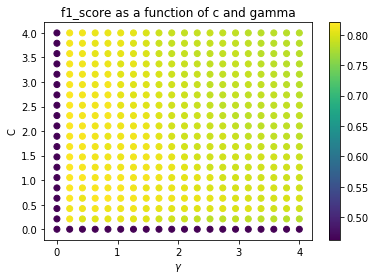

In [120]:

# plt.plot(bss[:,0], bss[:,2], alpha=0.5)
plt.scatter(gammass, css, c=f1ss)
plt.xlabel(r'$\gamma$')
plt.ylabel('C')
plt.title('f1_score as a function of c and gamma')
plt.colorbar()

# Parte en clase

## kernel linear

In [2]:
spam = pd.read_csv('spam7.csv')
spam.head()

,Unnamed: 0,crl.tot,dollar,bang,money,n000,make,yesno
0,1,278,0.000,0.778,0.00,0.00,0.00,y
1,2,1028,0.180,0.372,0.43,0.43,0.21,y
2,3,2259,0.184,0.276,0.06,1.16,0.06,y
3,4,191,0.000,0.137,0.00,0.00,0.00,y
4,5,191,0.000,0.135,0.00,0.00,0.00,y


In [3]:
spam['target'] = list(map(lambda x : 1 if x=='y' else -1, spam.yesno))

In [4]:
feats = spam.columns[1:-2]
print(feats)

Index(['crl.tot', 'dollar', 'bang', 'money', 'n000', 'make'], dtype='object')


In [6]:
spam[feats]=spam[feats].apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))

In [7]:
spam.head()

,Unnamed: 0,crl.tot,dollar,bang,money,n000,make,yesno,target
0,1,-0.000334,-0.012629,0.015670,-0.007541,-0.018651,-0.023029,y,1
1,2,0.047015,0.017356,0.003169,0.026859,0.060249,0.023226,y,1
2,3,0.124729,0.018023,0.000213,-0.002741,0.194194,-0.009814,y,1
3,4,-0.005826,-0.012629,-0.004066,-0.007541,-0.018651,-0.023029,y,1
4,5,-0.005826,-0.012629,-0.004128,-0.007541,-0.018651,-0.023029,y,1


In [17]:
all_train , all_test = train_test_split(spam,test_size=0.25)

In [35]:
# X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
# y = np.array([1, 2, 3, 4])
cs = [2**i for i in range(4,15,1)]
valErr = []
testErr = []
for c in cs:
    kf = KFold(n_splits=5)
    kf.get_n_splits(all_train[feats])


    cvValErr=[]
    cvTestErr=[]
    for train_index, test_index in kf.split(all_train):
    #     print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = all_train.iloc[train_index][feats], all_train.iloc[test_index][feats]
        y_train, y_test = all_train.iloc[train_index]['target'], all_train.iloc[test_index]['target']
        clf = svm.SVC(kernel='linear', C=c)
    #     print(X_test)
        clf.fit(X_train,y_train)
        cvValErr.append(f1_score(clf.predict(X_test),y_test))
        cvTestErr.append(f1_score(clf.predict(all_test[feats]),all_test.target))
    cvValErr=np.array(cvValErr)
    cvTestErr=np.array(cvTestErr)
    valErr.append(np.mean(cvValErr))
    testErr.append(np.mean(cvTestErr))

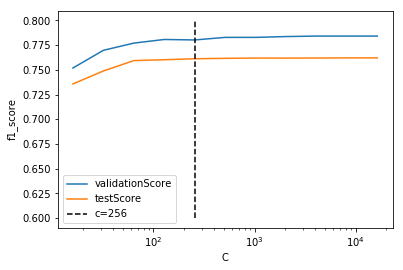

In [49]:
plt.plot(cs,valErr,label='validationScore')
plt.plot(cs,testErr,label='testScore')
plt.xlabel('C')
plt.ylabel('f1_score')
plt.xscale('log')

testErr=np.array(testErr)
cs = np.array(cs)
maxcs=cs[testErr==0.7612396627433378]

plt.plot([maxcs,maxcs],[0.6,0.8],c='black',linestyle='--',label='c={}'.format(maxcs[0]))
plt.legend()

Vemos que el f1 score se satura a partir de c=256. Así pues, podemos decir que el mejor c es 256

## kernel radial

In [53]:
# X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
# y = np.array([1, 2, 3, 4])
cs = [2**i for i in range(4,15,3)]
gammas = [2**i for i in range(4,15,3)]
valErr = []
testErr = []
cont=0
for c in cs:
    for gamma in gammas:
        print('\r',cont/(len(gammas)*len(cs)),end='')
        cont+=1
        kf = KFold(n_splits=5)
        kf.get_n_splits(all_train[feats])


        cvValErr=[]
        cvTestErr=[]
        for train_index, test_index in kf.split(all_train):
        #     print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test = all_train.iloc[train_index][feats], all_train.iloc[test_index][feats]
            y_train, y_test = all_train.iloc[train_index]['target'], all_train.iloc[test_index]['target']
            clf = svm.SVC(kernel='rbf', C=c,gamma=gamma)
        #     print(X_test)
            clf.fit(X_train,y_train)
            cvValErr.append(f1_score(clf.predict(X_test),y_test))
            cvTestErr.append(f1_score(clf.predict(all_test[feats]),all_test.target))
        cvValErr=np.array(cvValErr)
        cvTestErr=np.array(cvTestErr)
        valErr.append(np.mean(cvValErr))
        testErr.append(np.mean(cvTestErr))

 0.9375

KeyboardInterrupt: 

AttributeError: 'list' object has no attribute 'shape'

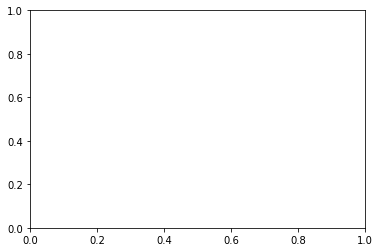

In [61]:
gammas = gammas*len(gammas)

# plt.plot(bss[:,0], bss[:,2], alpha=0.5)
plt.scatter(gammas, gammas, c=valErr)
plt.title('ValErr')
plt.xlabel(r'$\gamma$')
plt.ylabel('C')
plt.title('f1_score as a function of c and gamma')
plt.colorbar()

In [60]:
gammas

[16,
 128,
 1024,
 8192,
 16,
 128,
 1024,
 8192,
 16,
 128,
 1024,
 8192,
 16,
 128,
 1024,
 8192]

In [ ]:

# plt.plot(bss[:,0], bss[:,2], alpha=0.5)
plt.scatter(gammas, cs, c=valErr)
plt.title('ValErr')
plt.xlabel(r'$\gamma$')
plt.ylabel('C')
plt.title('f1_score as a function of c and gamma')
plt.colorbar()